In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
df = pd.read_csv('data/diamonds.csv')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [4]:
df.shape

(53940, 10)

## Handle Duplicated rows

In [5]:
df[df.duplicated()].head()

,carat,cut,color,clarity,depth,table,x,y,z,price
1005,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
1006,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
1007,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
1008,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
2025,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105


In [6]:
df = df.drop_duplicates(keep='first')

In [7]:
df.shape

(53794, 10)

## Check null values

In [8]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [9]:
df.describe()

,carat,depth,table,x,y,z,price
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,5.731214,5.734653,3.538714,3933.065082
std,0.47339,1.429909,2.233679,1.120695,1.141209,0.705037,3988.114460
min,0.20000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.40000,61.000000,56.000000,4.710000,4.720000,2.910000,951.000000
50%,0.70000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.04000,62.500000,59.000000,6.540000,6.540000,4.030000,5326.750000
max,5.01000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


## EDA

### Distribution of price

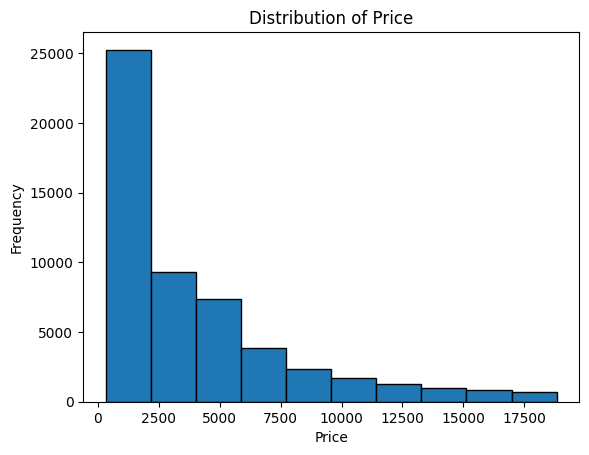

In [49]:
df['price'].plot(kind='hist',title='Distribution of Price', edgecolor='black')
plt.xlabel('Price')
# plt.savefig('images/price_dist')
plt.show()

 **Distribution of Price:**
    *   The price distribution is heavily skewed to the right. Most diamonds are concentrated in the lower price ranges (under 5,000).
    *   The long tail to the right indicates that a small number of diamonds have extremely high prices (going above $17,500). These high-priced diamonds are outliers compared to the bulk of the data.

### Distribution of carat size

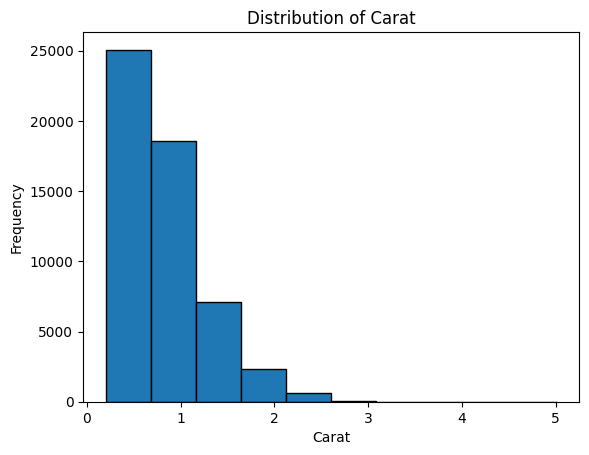

In [54]:
df['carat'].plot(kind='hist',title='Distribution of Carat', edgecolor='black')
plt.xlabel('Carat')
# plt.savefig('images/carat_dist')
plt.show()

 **Distribution of Carat:**
    *   The vast majority of diamonds are clustered on the left side of the chart, with carats between 0 and 1.5.
    *   The histogram has a very long "tail" extending to the right, showing that there are a few diamonds with much higher carat values (stretching up to 5). These high-carat diamonds are far from the central cluster and are considered extreme outliers.


### Relationship Explorations

1. price vs carat

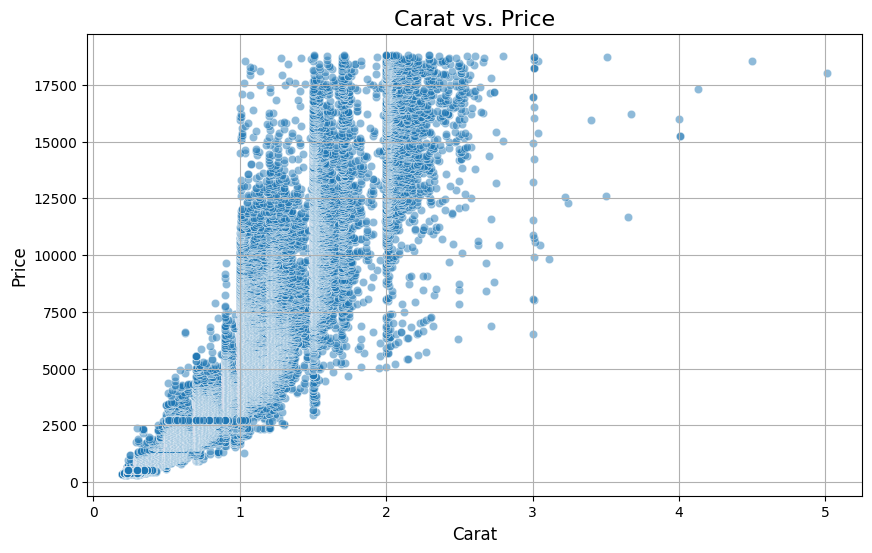

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y='price',x='carat',data=df, alpha=0.5)
plt.title('Carat vs. Price', fontsize=16)
plt.xlabel('Carat', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True)
# plt.savefig('images/price_carat_scatter.png')
plt.show()

In [13]:
corr_matrix = df[['carat','price']].corr()
corr_matrix

,carat,price
carat,1.000000,0.921548
price,0.921548,1.000000


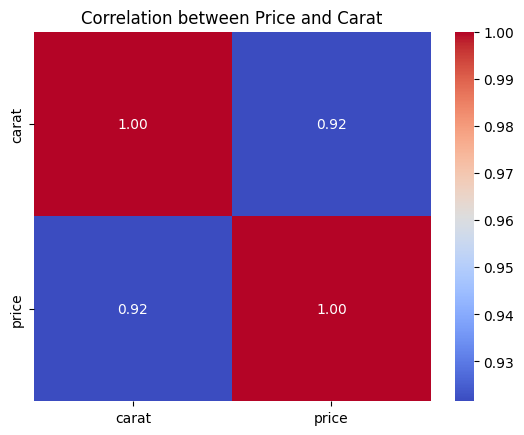

In [50]:
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Price and Carat')
# plt.savefig('images/price_carat_corr')
plt.show()

This heatmap visually and numerically confirms a very strong positive correlation between the carat and price of diamonds.

### Cut / Color / Clarity vs Price

- Which cut has the highest average price?
- Which color grade is most expensive?
- Which clarity grade commands higher prices?

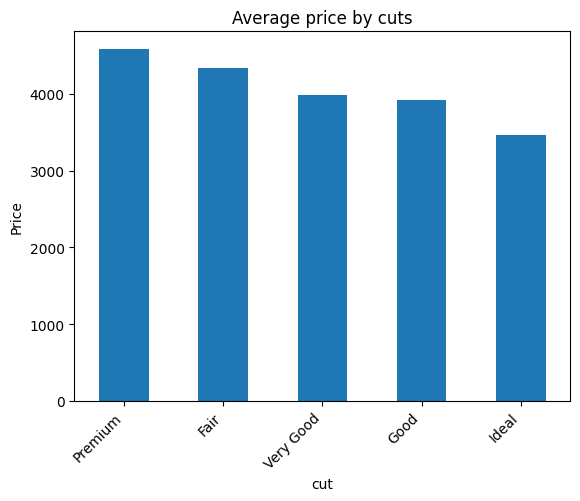

In [53]:
df.groupby('cut')['price'].mean().sort_values(ascending=False) \
    .plot(kind='bar')

plt.title('Average price by cuts')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Price')
# plt.savefig('images/avg_price_cuts')
plt.show()

### Depth & Table Proportions

- Are some depth values unusually low/high?
- Does depth or table correlate with price?

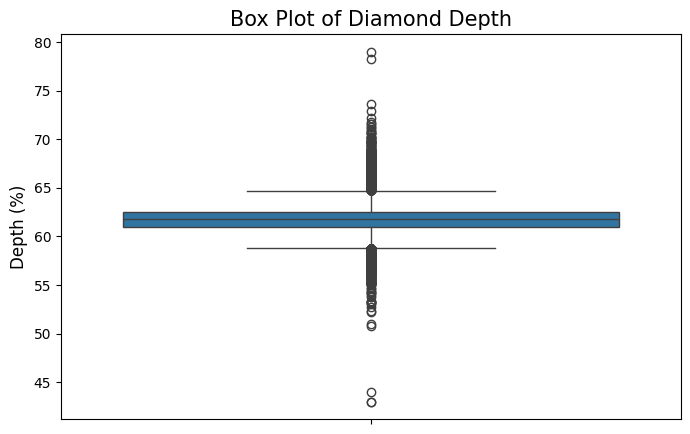

In [36]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['depth'])
plt.title('Box Plot of Diamond Depth', fontsize=15)
plt.ylabel('Depth (%)', fontsize=12)
plt.show()

While most diamonds adhere to a very specific depth range, the dataset contains a large quantity of diamonds that fall outside this standard range, making them clear outliers.

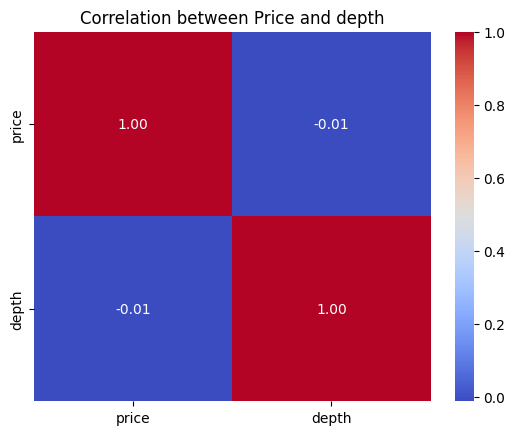

In [29]:
dept_corr_matrix = df[['price' ,'depth']].corr()
sns.heatmap(dept_corr_matrix,annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Price and depth')
plt.show()

No linear realtionship between price and depth

### Multi-variable Insights
- Among diamonds with similar carat, which factor (cut/color/clarity) increases the price more?
- Does combining cut + color + clarity show clear price tiers?

In [39]:
# For diamonds within a narrow carat range (e.g., 0.9-1.1)
subset = df[(df['carat'] >= 0.9) & (df['carat'] <= 1.1)]
subset.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
97,0.96,Fair,F,SI2,66.3,62.0,6.27,5.95,4.07,2759
112,0.90,Premium,I,VS2,63.0,58.0,6.16,6.12,3.87,2761
126,0.91,Premium,H,SI1,61.4,56.0,6.09,5.97,3.70,2763
128,0.91,Fair,H,SI2,64.4,57.0,6.11,6.09,3.93,2763
129,0.91,Fair,H,SI2,65.7,60.0,6.03,5.99,3.95,2763


In [41]:
from scipy.stats import pearsonr

# Calculate correlation of price with each factor
for factor in ['cut', 'color', 'clarity']:
    # Convert categorical to numeric if needed
    corr, p_value = pearsonr(subset[factor].astype('category').cat.codes, subset['price'])
    print(f"{factor}: correlation = {corr:.3f}")

cut: correlation = 0.099
color: correlation = -0.318
clarity: correlation = 0.471


In [46]:
# Assign numeric values to each grade
cut_map = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
color_map = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
clarity_map = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}

df['cut_score'] = df['cut'].map(cut_map)
df['color_score'] = df['color'].map(color_map)
df['clarity_score'] = df['clarity'].map(clarity_map)

# Combined quality score (simple average or weighted)
df['quality_score'] = df['cut_score'] + df['color_score'] + df['clarity_score']

# Or weighted if you want to emphasize certain factors
# df['quality_score'] = df['cut_score']*1 + df['color_score']*2 + df['clarity_score']*2

<Figure size 1200x600 with 0 Axes>

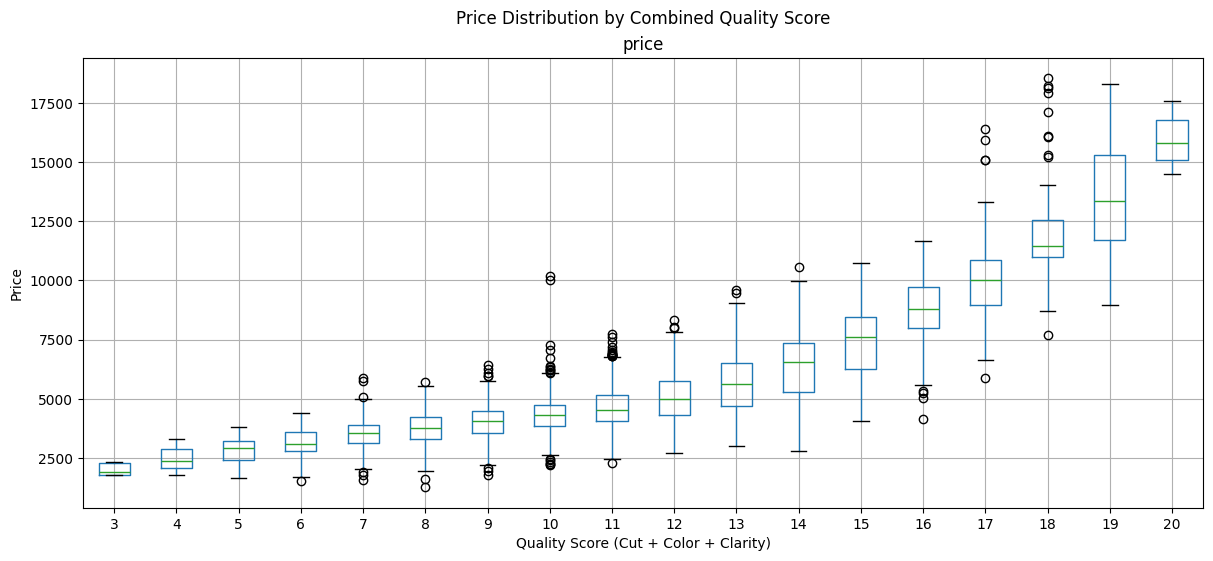

In [52]:
subset = df[(df['carat'] >= 0.9) & (df['carat'] <= 1.1)]

plt.figure(figsize=(12, 6))
subset.boxplot(column='price', by='quality_score', figsize=(14, 6))
plt.suptitle('Price Distribution by Combined Quality Score')
plt.xlabel('Quality Score (Cut + Color + Clarity)')
plt.ylabel('Price')
# plt.savefig('images/price_dist_quality_score')
plt.show()

The combined score DOES create price tiers, especially at the extremes, but there's substantial overlap in the middle ranges (10-16). This suggests that while the three factors together matter, carat weight or other unmeasured factors are still creating significant price variation within each quality tier.